<a href="https://colab.research.google.com/github/coder-manan-aggarwal/deep-learning/blob/main/Tranfer_learning_using_feature_extraction_with_dataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 157MB/s]
100% 1.06G/1.06G [00:05<00:00, 218MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [6]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
conv_base.trainable = False

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [11]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 281ms/step - accuracy: 0.8311 - loss: 0.4154 - val_accuracy: 0.9048 - val_loss: 0.2235
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 270ms/step - accuracy: 0.8958 - loss: 0.2429 - val_accuracy: 0.9160 - val_loss: 0.2033
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 281ms/step - accuracy: 0.9081 - loss: 0.2152 - val_accuracy: 0.9122 - val_loss: 0.2004
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 282ms/step - accuracy: 0.9142 - loss: 0.2031 - val_accuracy: 0.9152 - val_loss: 0.2028
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 281ms/step - accuracy: 0.9197 - loss: 0.1935 - val_accuracy: 0.9150 - val_loss: 0.2016
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 280ms/step - accuracy: 0.9214 - loss: 0.1831 - val_accuracy: 0.9160 - val_loss: 0.2021
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 272ms/step - accuracy: 0.9250 - loss: 0.1747 - val_accuracy: 0.9074 - val_loss: 0.2189
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 273ms/step - accuracy: 0.9288 -

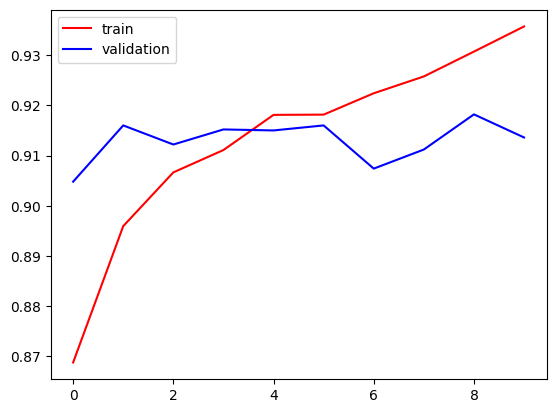

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

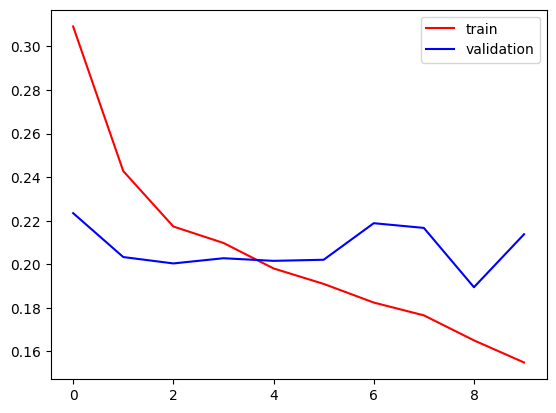

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()